# Mapping of amino acids to numerical space

## Naive mapping

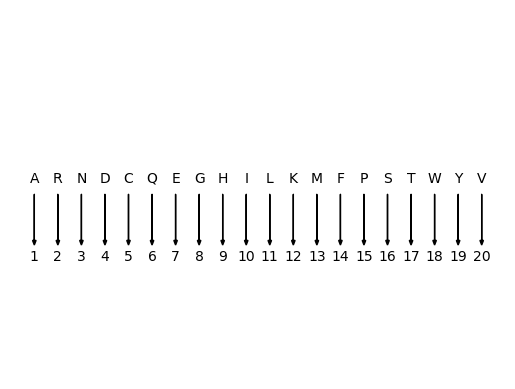

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_amino_acids():
    amino_acids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

    for i, aa in enumerate(amino_acids, start=1):
        plt.text(i, 0.001, aa, ha='center', va='bottom', fontsize=10)  # plot text
        plt.text(i, -0.006, str(i), ha='center', va='top', fontsize=10)  # plot number
        plt.arrow(i, 0, 0, -0.005, head_width=0.15, head_length=0.0005, fc='k', ec='k')  # plot arrow

    plt.ylim(-0.02, 0.02)  # set y-axis limits
    plt.axis('off')  # turn off the axis
    plt.savefig('plots/naive_mapping.png')
    plt.show()

plot_amino_acids()

## mapping to vectors

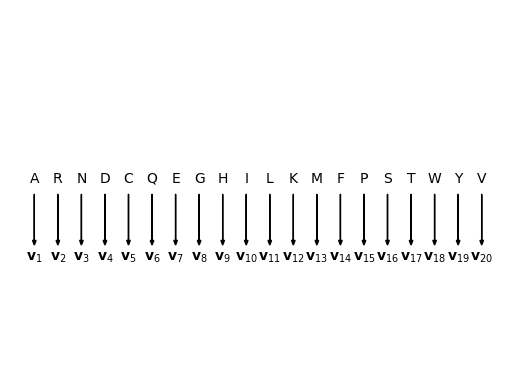

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_amino_acids():
    amino_acids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

    for i, aa in enumerate(amino_acids, start=1):
        plt.text(i, 0.001, aa, ha='center', va='bottom', fontsize=10)  # plot text
        plt.text(i, -0.006, r'$\mathbf{{v}}_{{{}}}$'.format(i), ha='center', va='top', fontsize=10)  # plot vector
        plt.arrow(i, 0, 0, -0.005, head_width=0.15, head_length=0.0005, fc='k', ec='k')  # plot arrow

    plt.ylim(-0.02, 0.02)  # set y-axis limits
    plt.axis('off')  # turn off the axis
    plt.savefig('plots/vector_mapping.png')
    plt.show()

plot_amino_acids()


# Fitness landscape of proteins

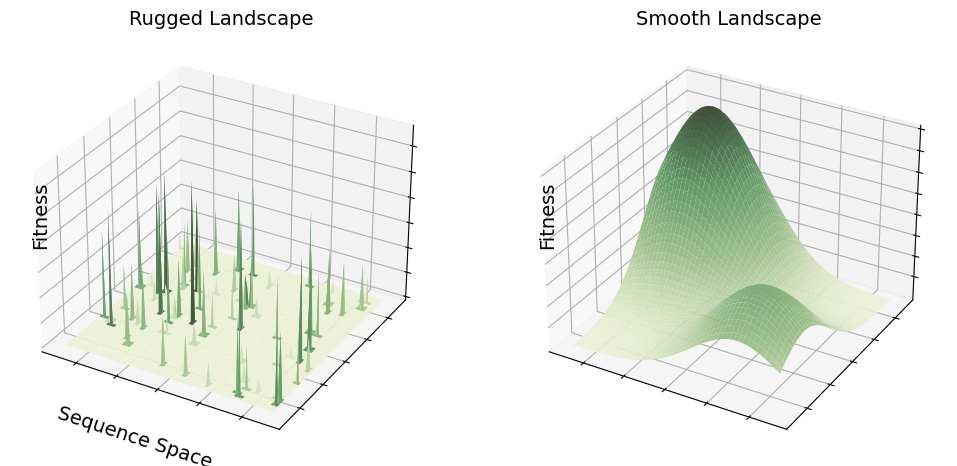

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Define the rugged landscape as a mostly flat surface with some random spikes
np.random.seed(0)  # for reproducibility
z1 = np.zeros(x.shape)  # create a flat surface
indices = np.random.choice(z1.size, size=int(0.01*z1.size), replace=False)  # select 1% of the indices
z1.ravel()[indices] = np.abs(np.random.normal(0, 5, indices.size))  # set the selected indices to random high values

# Define the smooth landscape as a surface with two Gaussian hills of different heights
z2 = 2*np.exp(-0.1*((x+3)**2 + (y-3)**2)) + np.exp(-0.1*((x-3)**2 + (y+3)**2))

# Create a custom colormap
colors = ["#EDF1D6", "#9DC08B", "#609966", "#40513B"]
cmap = LinearSegmentedColormap.from_list("custom", colors)

# Create the 3D plots
fig = plt.figure(figsize=(12, 6))

# Plot the rugged landscape
ax1 = fig.add_subplot(1, 2, 1, projection='3d')  # 1 row, 2 columns, first plot
ax1.plot_surface(x, y, z1, cmap=cmap)
ax1.set_title('Rugged Landscape', fontsize=14)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])
ax1.text2D(0.05, 0.5, "Fitness", transform=ax1.transAxes, rotation='vertical', fontsize=14)
ax1.set_xlabel('Sequence Space', fontsize=14)

# Plot the smooth landscape
ax2 = fig.add_subplot(1, 2, 2, projection='3d')  # 1 row, 2 columns, second plot
ax2.plot_surface(x, y, z2, cmap=cmap)
ax2.set_title('Smooth Landscape', fontsize=14)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_zticklabels([])
ax2.text2D(0.05, 0.5, "Fitness", transform=ax2.transAxes, rotation='vertical', fontsize=14)

plt.show()


## Chemical equilibrium

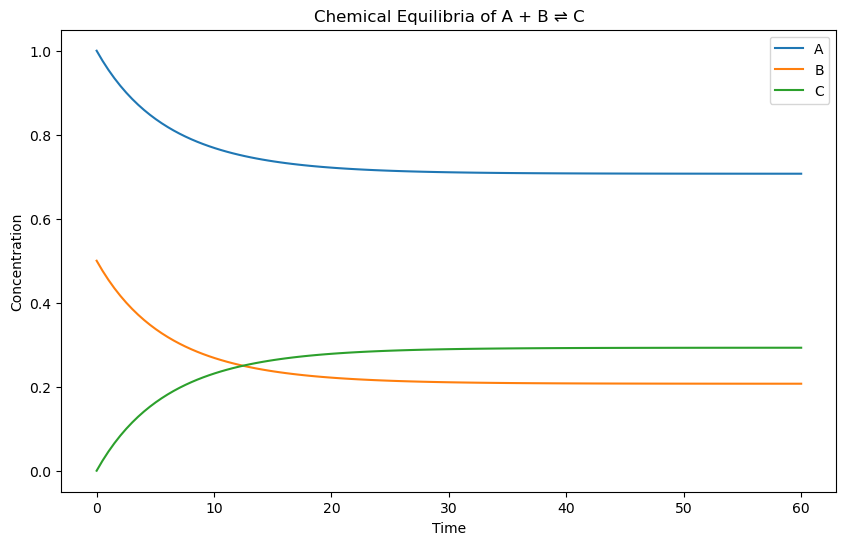

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the reaction rates
k1 = 0.1  # rate of forward reaction A + B -> C
k2 = 0.05  # rate of reverse reaction C -> A + B

# Define the system of ODEs
def system(concentrations, t):
    A, B, C = concentrations
    dAdt = -k1*A*B + k2*C
    dBdt = -k1*A*B + k2*C
    dCdt = k1*A*B - k2*C
    return [dAdt, dBdt, dCdt]

# Initial concentrations
A0 = 1.0
B0 = 0.5
C0 = 0.0
initial_concentrations = [A0, B0, C0]

# Time points
t = np.linspace(0, 60, 120)

# Solve the ODE
concentrations = odeint(system, initial_concentrations, t)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(t, concentrations[:, 0], label='A')
plt.plot(t, concentrations[:, 1], label='B')
plt.plot(t, concentrations[:, 2], label='C')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Chemical Equilibria of A + B ⇌ C')
plt.legend()
plt.savefig('plots/chem_eq.png')
plt.show()


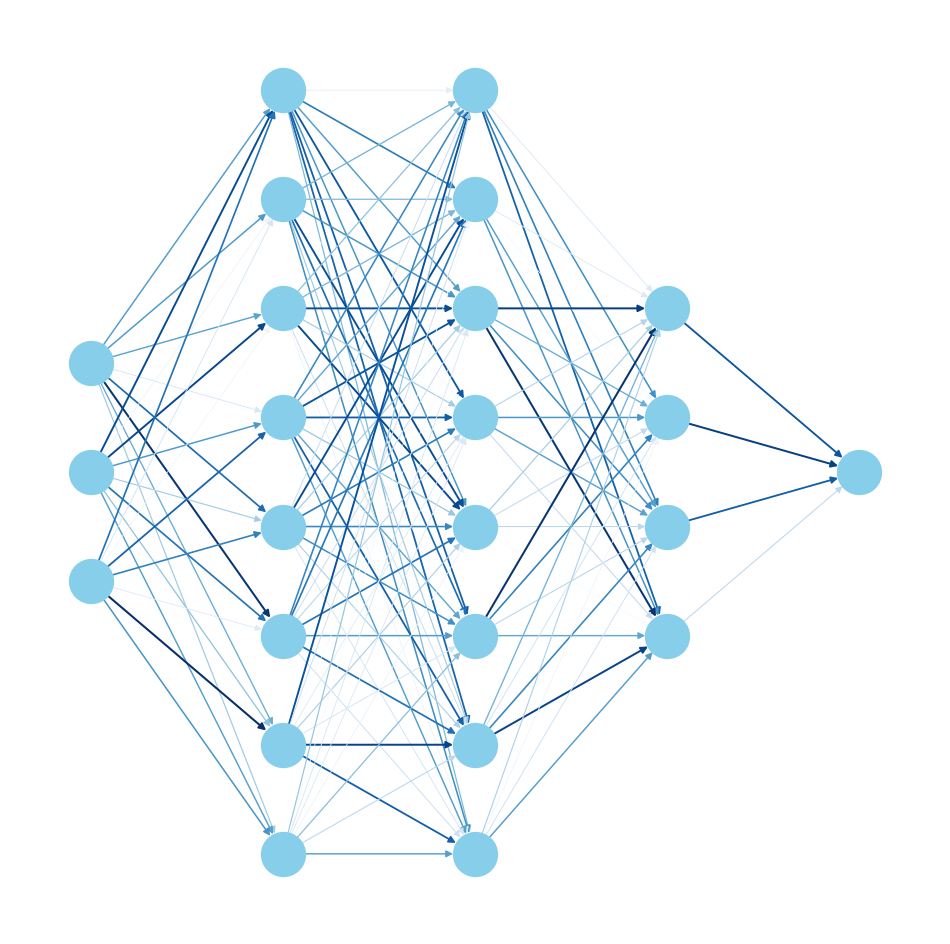

In [44]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def draw_neural_net(ax, layer_sizes):
    n_layers = len(layer_sizes)
    node_positions = {}
    max_layer_size = max(layer_sizes)
    
    for layer in range(n_layers):
        for node in range(layer_sizes[layer]):
            node_positions[(layer, node)] = (layer, (max_layer_size - 1)/2 - node + layer_sizes[layer]/2)

    neural_network = nx.DiGraph()

    for layer in range(1, n_layers):
        for node in range(layer_sizes[layer - 1]):
            for next_node in range(layer_sizes[layer]):
                neural_network.add_edge((layer - 1, node), (layer, next_node))

    edge_colors = [np.random.rand() * 0.5 for edge in neural_network.edges()]  # Reduce the maximum darkness of the lines
    edge_widths = [color * 2 + 0.5 for color in edge_colors]  # Reduce the maximum thickness of the lines

    nx.draw(neural_network, node_positions, node_color='skyblue', node_size=1000, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=edge_widths, ax=ax)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
draw_neural_net(ax, [3, 8, 8, 4, 1])  # You can change the numbers here to change the number of nodes in each layer
plt.show()


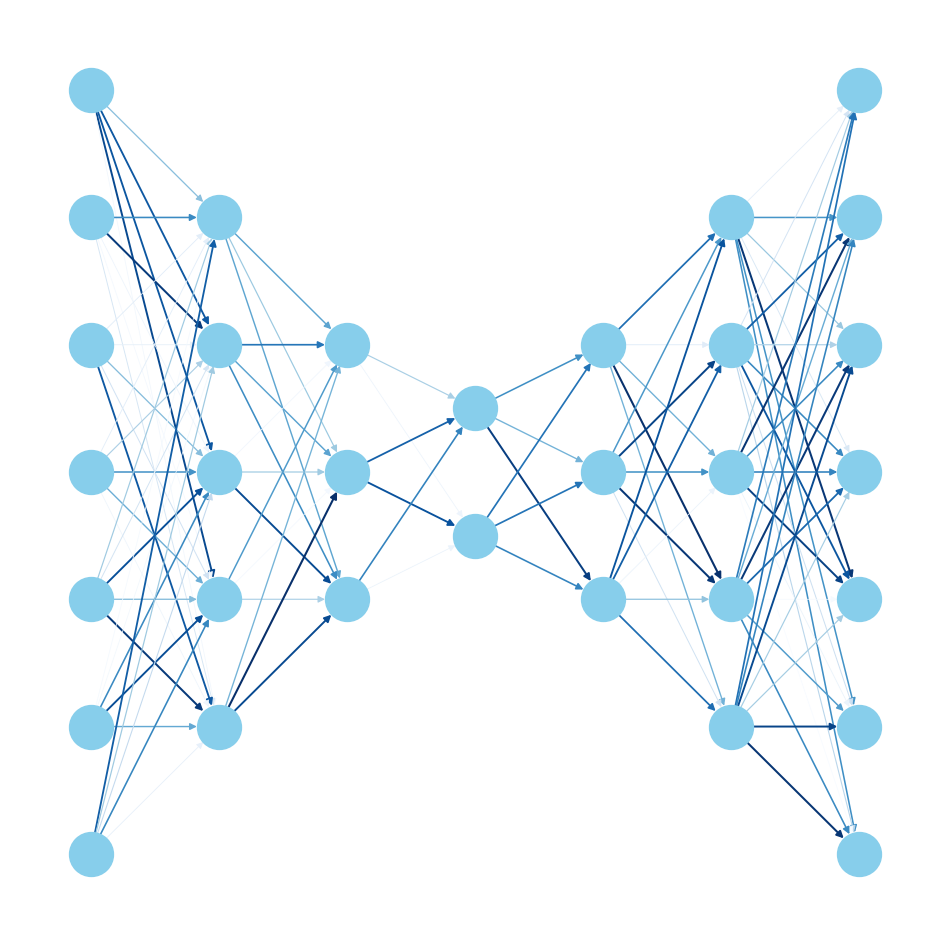

In [68]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def draw_neural_net(ax, layer_sizes):
    n_layers = len(layer_sizes)
    node_positions = {}
    max_layer_size = max(layer_sizes)
    
    for layer in range(n_layers):
        for node in range(layer_sizes[layer]):
            node_positions[(layer, node)] = (layer, (max_layer_size - 1)/2 - node + layer_sizes[layer]/2)

    neural_network = nx.DiGraph()

    for layer in range(1, n_layers):
        for node in range(layer_sizes[layer - 1]):
            for next_node in range(layer_sizes[layer]):
                neural_network.add_edge((layer - 1, node), (layer, next_node))

    edge_colors = [np.random.rand() * 0.5 for edge in neural_network.edges()]  # Reduce the maximum darkness of the lines
    edge_widths = [color * 2 + 0.5 for color in edge_colors]  # Reduce the maximum thickness of the lines

    nx.draw(neural_network, node_positions, node_color='skyblue', node_size=1000, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=edge_widths, ax=ax)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
draw_neural_net(ax, [7, 5, 3, 2, 3, 5, 7])  # You can change the numbers here to change the number of nodes in each layer
plt.show()


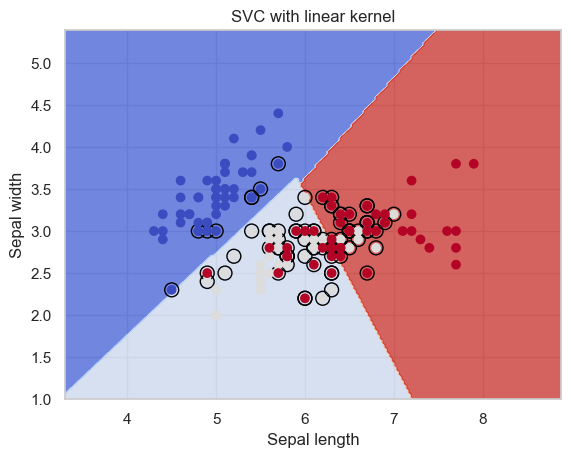

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import seaborn as sns

# Setup seaborn
sns.set_style("whitegrid")
sns.set_context("notebook")

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We only take the first two features.
y = iris.target

# Create an SVM instance and fit out data. 
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary and margins
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', marker='o')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()
